### NIM         : 2201741971 / 2401822232
### Name        : Edward
### Class       : LTY2
### Course      : Selected Topics in Computational Intelligence II
### Course Code : COMP8039041
### Source    : https://machinelearningmastery.com/neural-network-models-for-combined-classification-and-regression/

### Import Required Library

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from numpy import unique
from numpy import argmax
from pandas import read_csv
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

### Read Dataset

In [2]:
# load and summarize the abalone dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/abalone.csv'
dataframe = read_csv(url, header=None)
# summarize shape
print(dataframe.shape)
# summarize first few lines
print(dataframe.head())

(4177, 9)
   0      1      2      3       4       5       6      7   8
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7


### Training Preparation

In [3]:
dataset = dataframe.values

# split into input (X) and output (y) variables
X, y = dataset[:, 1:-1], dataset[:, -1]
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]

In [4]:
# encode strings to integer
y_class = LabelEncoder().fit_transform(y)
n_class = len(unique(y_class))

### Split Data

In [5]:
# split data into train and test sets
X_train, X_test, y_train, y_test, y_train_class, y_test_class = train_test_split(X, y, y_class, test_size=0.33, random_state=1)

### Defined Architecture

In [6]:
# input
visible = Input(shape=(n_features,))
hidden1 = Dense(20, activation='relu', kernel_initializer='he_normal')(visible)
hidden2 = Dense(10, activation='relu', kernel_initializer='he_normal')(hidden1)

### Regression Model

In [7]:
# regression output
out_reg = Dense(1, activation='linear')(hidden2)

### Classification Model

In [8]:
# classification output
out_clas = Dense(n_class, activation='softmax')(hidden2)

### Defined Model and Fitting

In [9]:
# define model
model = Model(inputs=visible, outputs=[out_reg, out_clas])
# compile the keras model
model.compile(loss=['mse','sparse_categorical_crossentropy'], optimizer='adam')
# plot graph of model
plot_model(model, to_file='model.png', show_shapes=True)
# fit the keras model on the dataset
model.fit(X_train, [y_train,y_train_class], epochs=150, batch_size=32, verbose=2)

Epoch 1/150
88/88 - 1s - loss: 92.1937 - dense_2_loss: 88.9471 - dense_3_loss: 3.2466 - 1s/epoch - 12ms/step
Epoch 2/150
88/88 - 0s - loss: 35.7429 - dense_2_loss: 33.0414 - dense_3_loss: 2.7015 - 141ms/epoch - 2ms/step
Epoch 3/150
88/88 - 0s - loss: 12.5383 - dense_2_loss: 9.9855 - dense_3_loss: 2.5528 - 218ms/epoch - 2ms/step
Epoch 4/150
88/88 - 0s - loss: 11.8079 - dense_2_loss: 9.2864 - dense_3_loss: 2.5215 - 301ms/epoch - 3ms/step
Epoch 5/150
88/88 - 0s - loss: 11.3448 - dense_2_loss: 8.8353 - dense_3_loss: 2.5095 - 249ms/epoch - 3ms/step
Epoch 6/150
88/88 - 0s - loss: 10.9135 - dense_2_loss: 8.4126 - dense_3_loss: 2.5010 - 298ms/epoch - 3ms/step
Epoch 7/150
88/88 - 0s - loss: 10.5189 - dense_2_loss: 8.0257 - dense_3_loss: 2.4932 - 283ms/epoch - 3ms/step
Epoch 8/150
88/88 - 0s - loss: 10.1520 - dense_2_loss: 7.6642 - dense_3_loss: 2.4879 - 285ms/epoch - 3ms/step
Epoch 9/150
88/88 - 0s - loss: 9.8266 - dense_2_loss: 7.3437 - dense_3_loss: 2.4829 - 402ms/epoch - 5ms/step
Epoch 10/15

### Make Prediction

In [10]:
# make predictions on test set
yhat1, yhat2 = model.predict(X_test)

### Evaluate Model from MAE and Accuracy

In [11]:
# calculate error for regression model
error = mean_absolute_error(y_test, yhat1)
print('MAE: %.3f' % error)

MAE: 1.613


In [12]:
# evaluate accuracy for classification model
yhat2 = argmax(yhat2, axis=-1).astype('int')
acc = accuracy_score(y_test_class, yhat2)
print('Accuracy: %.3f' % acc)

Accuracy: 0.241


### Plot Final Architecture

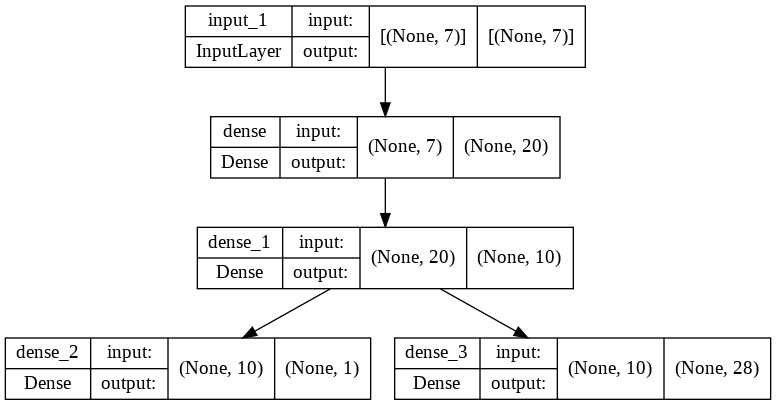

In [13]:
from IPython.display import Image
plot_model(model, to_file='regressionVSclassification.png', show_shapes=True,show_layer_names=True)
Image(filename='regressionVSclassification.png')